In [1]:
! pip install drawSvg

In [2]:
import drawSvg as draw
import numpy as np

In [3]:
N = 4 # number of pads
diameter = 1200 # diameter of the pads, in pixel

In [4]:
def po2ca(r, theta, dt=0):
    return r * np.cos(0.5 * np.pi - theta + dt), r * np.sin(0.5 * np.pi - theta + dt)

per = 0.8

theta = np.arange(100)/99 * 2 * np.pi / N * per
r1 = theta * 0 + 600
r2 = 600 - ((100 / max(theta)) * theta)
r3 = 500 - ((100 / max(theta)) * theta)
r4 = 400 - ((100 / max(theta)) * theta)
r5 = theta * 0 + 300
r6 = 400 - ((100 / max(theta)) * theta)
r7 = 500 - ((100 / max(theta)) * theta)
r8 = 600 - ((100 / max(theta)) * theta)

r = np.hstack((r1, r2, r3, r4, r5, np.flip(r6), np.flip(r7), np.flip(r8)))
theta = np.hstack((theta, np.flip(theta), theta, np.flip(theta), -theta, np.flip(-theta), -theta, np.flip(-theta)))

points = np.vstack(po2ca(r, theta)).T

def np2points(arr):
    ans = []
    for i in range(arr.shape[0]):
        ans.append(arr[i, 0])
        ans.append(arr[i, 1])
    return ans

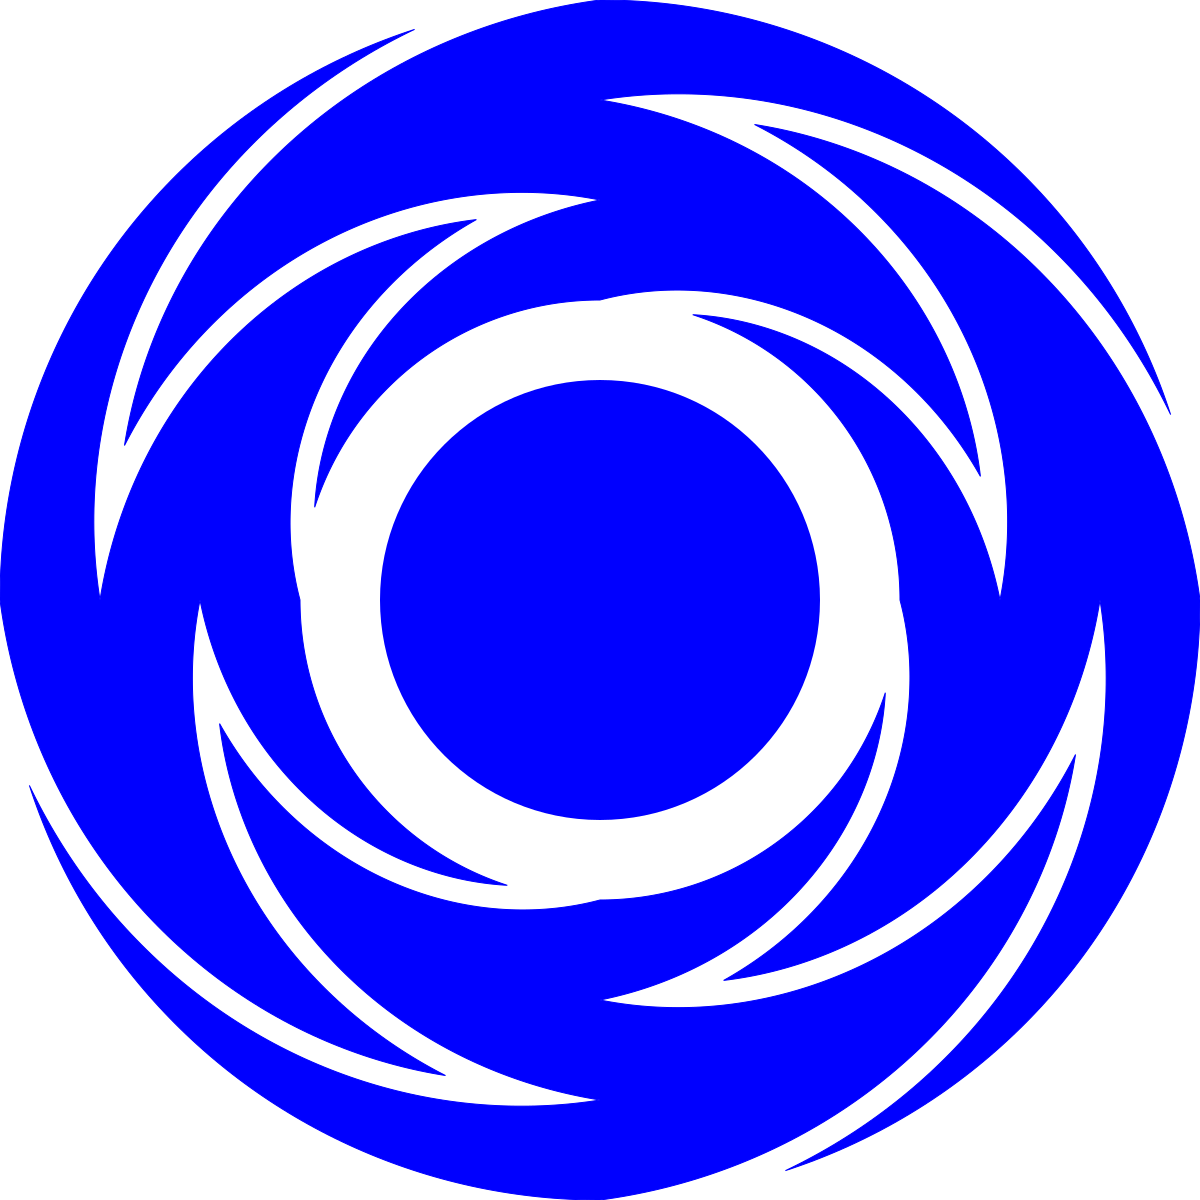

In [5]:
# Draw an irregular polygon
d = draw.Drawing(diameter, diameter, origin='center', displayInline=True)
for i in range(N):
    points = np.vstack(po2ca(r, theta, dt=i*2*np.pi/N)).T
    d.append(draw.Lines(*np2points(points),
                        close=True,
                fill='blue',
                stroke='blue'))
d.append(draw.Circle(0, 0, 220,
            fill='blue', stroke_width=0, stroke='blue'))
d

Shift + Right click on the figure above to save.